In [0]:
#!pip install --upgrade tables
#!pip install eli5

In [0]:
import pandas as pd
import numpy as np

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score

import eli5
from eli5.sklearn import PermutationImportance

### Wczytywanie danych

In [0]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car"

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car


In [0]:
df = pd.read_hdf('data/car.h5')
df.shape

(106494, 155)

In [0]:
df.columns[:10]

Index(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana'],
      dtype='object')

### Dummy Model

In [0]:
df.select_dtypes(np.number).columns

Index(['price_value', 'car_id'], dtype='object')

In [0]:
X=df[['car_id']].values
y=df['price_value'].values

model = DummyRegressor()
model.fit(X,y)
y_pred = model.predict(X)

print('Benchmark: ', mae(y, y_pred))

Benchmark:  39465.934630440985


In [0]:
[x for x in df.columns if 'price' in x]

['price_currency', 'price_details', 'price_value']

In [0]:
df.shape

(106494, 155)

In [0]:
df = df[df.price_currency == 'PLN']

In [0]:
df.shape

(106290, 155)

### Feautres

In [0]:
df.param_color.factorize()[0]

array([-1, -1, -1, ..., -1, -1, -1])

In [0]:
SUFFIX_CAT = '__cat'
for feat in df.columns:
  if isinstance(df[feat][0],list):continue

  factorized_values = df[feat].factorize()[0]
  if SUFFIX_CAT in feat: 
    df[feat] = factorized_values
  else:
    df[feat+SUFFIX_CAT] = factorized_values  

In [0]:
df.shape

(106290, 309)

In [0]:
cat_feats = [x for x in df.columns if SUFFIX_CAT in x]
cat_feats = [x for x in cat_feats if 'price' not in x]

In [0]:
len(cat_feats)

151

In [0]:
X = df [cat_feats].values
y = df['price_value'].values

model= DecisionTreeRegressor(max_depth=6)
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(scores)

-18367.75429233587

In [0]:
n = DecisionTreeRegressor(max_depth=5)
n.fit(X, y)

imp = PermutationImportance(n).fit(X, y)
eli5.show_weights(imp, feature_names=cat_feats)

Weight,Feature
0.1961 ± 0.0048,param_faktura-vat__cat
0.1917 ± 0.0073,param_napęd__cat
0.1813 ± 0.0044,param_stan__cat
0.1532 ± 0.0043,param_rok-produkcji__cat
0.0929 ± 0.0017,param_skrzynia-biegów__cat
0.0625 ± 0.0020,param_moc__cat
0.0427 ± 0.0015,feature_kamera-cofania__cat
0.0191 ± 0.0015,param_pojemność-skokowa__cat
0.0162 ± 0.0003,feature_bluetooth__cat
0.0110 ± 0.0005,feature_łopatki-zmiany-biegów__cat


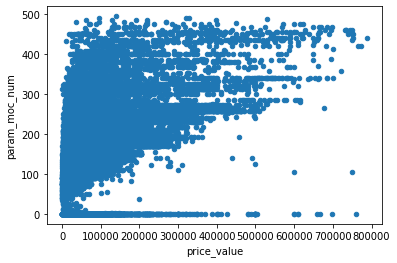

In [129]:
df.loc[df.param_moc.notna(),'param_moc_num'] = df[df.param_moc.notna()]['param_moc'].apply(lambda x: pd.to_numeric(x[:-3].replace(' ', '')))
df.loc[df.param_moc.isna(),'param_moc_num'] = 0
df[df['param_moc_num'] < 500 ][['param_moc_num', 'price_value']].plot.scatter(x='price_value', y='param_moc_num');

In [0]:
def group_and_barplot(feat_groupby, feat_agg='price_value', agg_funcs=[np.mean, np.median, np.size], feat_sort='mean', top=50, subplots=True):
  return(
  df
.groupby(feat_groupby)[feat_agg]
  .agg(agg_funcs)
  .sort_values(by=feat_sort, ascending=False)
  .head(top)
  .plot(kind='bar', figsize=(15,5), subplots=subplots)
)

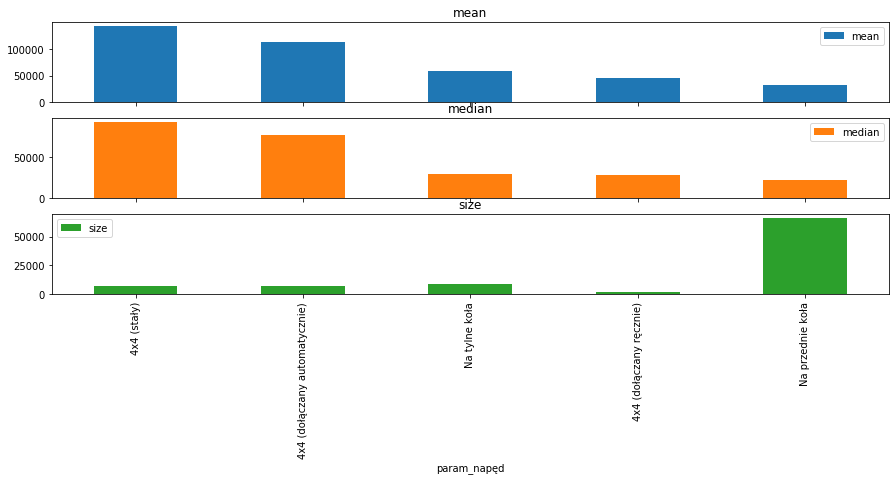

In [55]:
group_and_barplot('param_napęd');

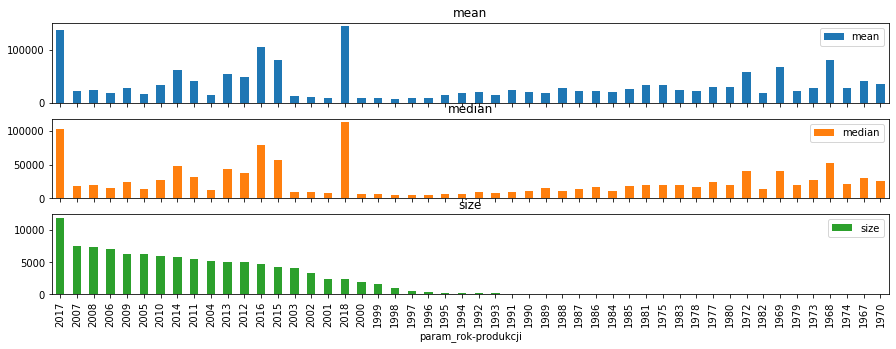

In [59]:
group_and_barplot('param_rok-produkcji', feat_sort='size');

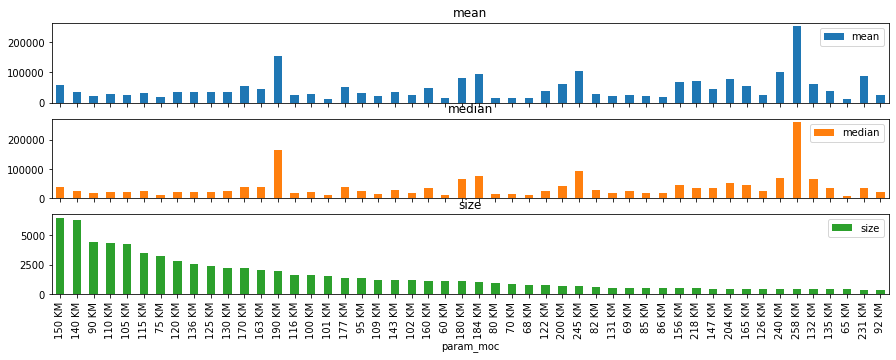

In [63]:
group_and_barplot('param_moc', feat_sort='size');

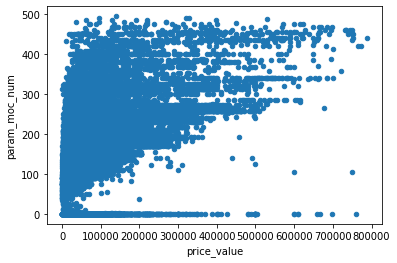